# Aula 6 - Exercícios - Gráficos

In [41]:
# Importe a biblioteca pandas e seaborn
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor

### 6.1 Plote um boxplot do índice de gini dos municípios brasileiros.
#### Dica 1: Veja o resultado esperado a seguir:

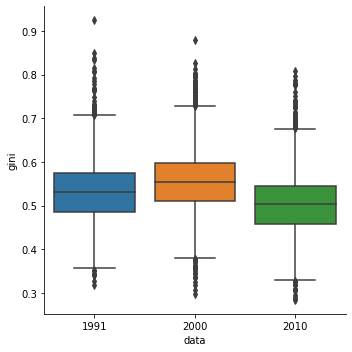

#### Dica 2: é necessário alguma manipulação dos dados antes de plotar o gráfico.

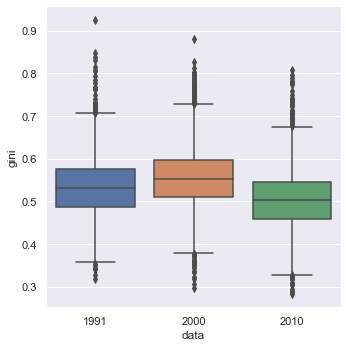

In [42]:
# Plote seu gráfico aqui
path_gini='https://raw.githubusercontent.com/alexlopespereira/curso_ciencia_dados2021/master/data/originais/gini/ginibr.csv'
df_gini = pd.read_csv(path_gini, sep=';', na_values='...', decimal=',', skiprows=2, skipfooter=2, encoding='utf8', engine='python')
df_unpivoted = df_gini.melt(id_vars=['Município'], var_name='data', value_name='gini')
df_unpivoted.head()
sns.catplot(kind='box', data=df_unpivoted, x='data', y='gini')

### 6.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.
#### Rotacione os labels do eixo x em 90 graus e diminua a frequência de aparição desses labels para você conseguir visualizar as datas.
#### Dica: 
```python
import matplotlib.ticker as ticker
g = sns.relplot(...) # Coloque seus argumentos aqui.
g.set_xticklabels(rotation=90)
## Este ajuste dos labels do eixo x não ficou legal... :( 
## g.axes.flat[0].xaxis.set_major_locator(ticker.MultipleLocator(3))
## Mas se você ajustar a quantidade de ticks e seus labels, esse resultado será atingido.
``` 
#### Pense em possíveis causas que possam explicar a aparência cíclica do gráfico. Se encontrar alguma explicação plausível, descreva ela logo após o seu gráfico.

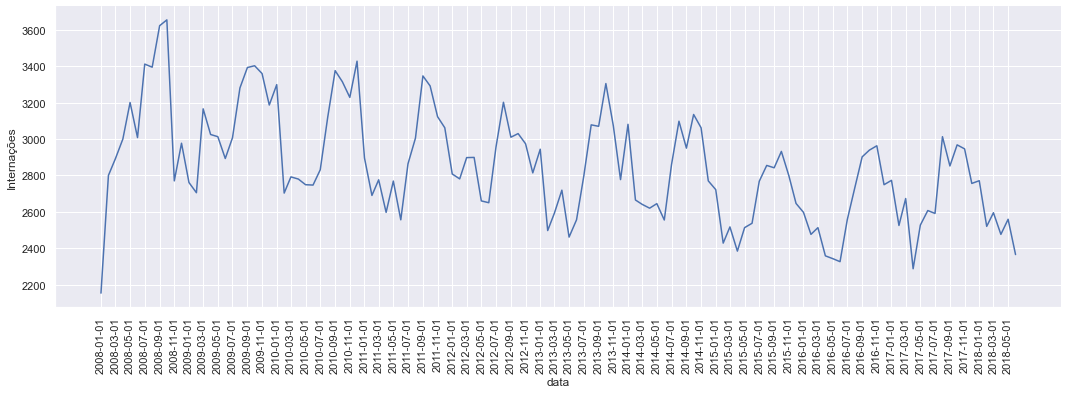

In [85]:
# Plote seu gráfico aqui
import matplotlib.ticker as ticker
import numpy as np
import datetime
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

path_curetagem='https://raw.githubusercontent.com/alexlopespereira/curso_ciencia_dados2021/master/data/originais/curetagem/consolidado/curetagem.csv'
curetagem2020 = pd.read_csv(path_curetagem, sep=";", na_values='-')
filtro = (curetagem2020['Unidade da Federação']=='35 São Paulo')
curetagem2020['data'] = pd.to_datetime(curetagem2020['mes_ano'], format='%Y/%b')
g = sns.relplot(data=curetagem2020[filtro], x='data', y='Internações', kind='line', aspect=3)
labels = curetagem2020['data'].unique()[::2] # Cria ticks de dois em dois meses
labels_str = [x.astype(str)[0:10] for x in labels] # Cria strings do objeto numpy.datetime64 armazenado em labels
g.set(xticks=labels) 
g.set_xticklabels(rotation=90, labels=labels_str)

# Comentários:
# 1) Abortos, geralmente, são realizados no início da gestação. Por exemplo, até os 3 meses de gestação.
# 2) Considerando que o pico médio foi em torno do mês 9 e 10, subtraindo-se 3 meses encontramos um pico médio
#      de gestação em torno de junho e julho.
# 3) Nos meses de junho e julho houveram proporcionalmente mais gestações indesejadas do que o restante dos outros
#      meses ou este resultado na verdade é apenas um efeito da oscilação de gestações em geral ao longo do ano?
#    Como você faria para dirimir esta dúvida?
# 4) Você pode analisar os dados de gestação em geral. Se não houver uma oscilação equivalente nos meses de junho
#      e julho, é provável que tenha havido mais gestações indesejadas nestes mesmos meses.

### 6.3 Plote um gráfico boxplot do dataset tips como o da figura a seguir.


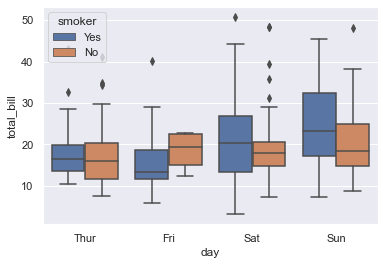

**Dica: utilize a função `load` do pacote seaborn para carregar o dataframe: `tips = sns.load_dataset("tips")`**

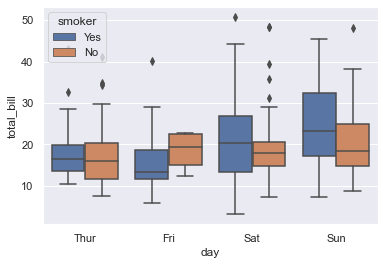

In [41]:
# Plote seu gráfico aqui 
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill",
            hue="smoker", 
            data=tips) 

### 6.4 Escreva uma função para fazer o merge do dataset de morbidade consolidado com o dataset de população
#### O dataset da população deve ficar a esquerda e o dataset da morbidade a direita no resultado.

In [86]:
# Dica 1: No dataset de morbidade existem valores NA representados por caracteres específicos em várias colunas 
#         do dataframe. Descubra quais são esses caracteres e especifiquei no argumento
#         na_values. Passe nesse argumento uma lista como os caracteres que devem ser 
#         interpretados como NA.
# Dica 2: No dataset de morbidade, especifique o separador, o caracter de números decimais e o tipo do dado do 
#         cod_ibge6 como str. Ou seja, dtype={'cod_ibge6': str}.
# Dica 3: No dataset de população, converta o cod_munic e cod_uf para str no momento de carregar o dataset de população,
#         usando novamente o argumento dtype. Exatamente como foi feito no exercício da aula 3.
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    ### BEGIN SOLUTION
    df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
    # Concatena o codigo da UF com o codigo do municipio
    df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda x: x[:-1])
    df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str}, 
                               na_values=['-', '...'])
    return pd.merge(df_pop, df_morbidade, on='cod_ibge6') 
    ### END SOLUTION


In [87]:
## Faça seus testes aqui
path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'


In [88]:
# Validação para nota
path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {'Internações': 149, 'AIH_aprovadas': 149, 'Valor_total': 101282.26}
df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
df_00015 = df_morbidade_pop[(df_morbidade_pop['mes']=='Abr') & (df_morbidade_pop['cod_munic']=='00015')]
df_00015 = df_00015.loc[:,['Internações', 'AIH_aprovadas', 'Valor_total']]
dict2 = df_00015.to_dict(orient='records')[0]
dict1 = df_morbidade_pop.iloc[0, 8:11].to_dict()
assert dict1 == test_data or dict2 == test_data

### 6.5 Faça o merge do dataset de morbidade com o dataset do índice de gini e plote um gráfico do tipo pairplot das seguintes variáveis (colunas): 'Internações',  'Óbitos', '2010' 



#### Dica: não tente plotar um pairplot de todas as variáveis, pois pode demorar bastante.

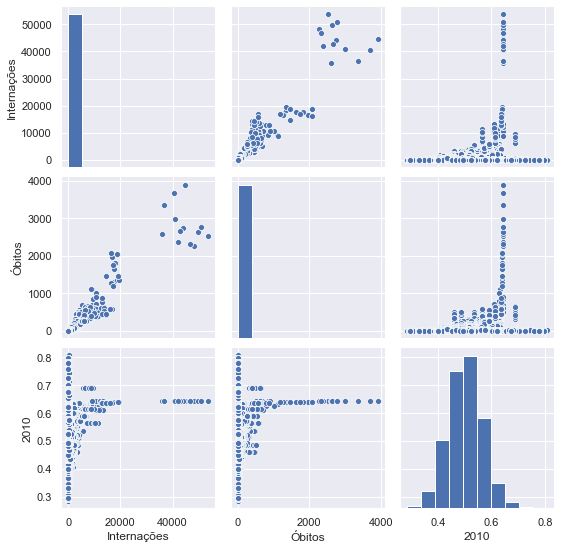

In [89]:
# Plote aqui seu gráfico

path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/gini/ginibr.csv'

def merge_morbidade_gini(path_gini, path_morbidade):
    """retorne o merge dos datasets de gini e morbidade.
    """
    ### BEGIN SOLUTION
    df_gini = pd.read_csv(path_gini, sep=';', skiprows=2, skipfooter=2, encoding='utf8',
                          engine='python', na_values='...', decimal=',')
    df_gini['cod_ibge6'] = df_gini['Município'].apply(lambda x: x.split(' ')[0])
    df_gini.loc[:, 'Município'] = df_gini.loc[:,'Município'].apply(lambda x: ' '.join(x.split(' ')[1:]))
    df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str},
                               na_values=['-', '...'])    
    return pd.merge(df_gini, df_morbidade, on=['cod_ibge6', 'Município'])

df = merge_morbidade_gini(path_gini, path_morbidade)
sns.pairplot(df[['Internações',  'Óbitos', '2010']])